# Adding reptiles

We have some data to compare alligators to birds and dinosaurs based on body mass, brain volume, and cerebrum volume. Although there are only two alligator data points (coded "R" for reptile), we can still build a decision tree to see how the computer can classify reptiles relative to birds and dinosaurs.

## Import libraries and data

Following your code from the PaleoNeuro_FinalProject_bonus notebook, import the libraries you need to build a decision tree and read the bird_dino_gator.csv file into a dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

df = pd.read_csv("../../data/bird_dino_gator.csv")
df.head()

,Species ID,Species Type,Body Mass (kg),Whole Brain (cm3),Cerebrum (cm3)
0,1,B,0.02,1.899,1.53
1,2,B,1.26,21.356,16.81
2,3,B,2.18,13.946,11.08
3,4,D,0.25,0.710,0.41
4,5,B,0.01,2.113,1.57


## Data cleaning

In this case, the data has columns for Body Mass (kg), whole brain volume (cm3) and cerebrum volume (cm3). Create two new columns for brain vs. body mass and cerebrum vs. whole brain.

In [2]:
df["Brain Body Ratio"] = df["Whole Brain (cm3)"]/(df["Body Mass (kg)"]*1000)
df["Cerebrum Ratio"] = df["Cerebrum (cm3)"]/df["Whole Brain (cm3)"]

Change the values of the "Species Type" column from "B" to "0", from "D" to "1", and from "R" to "2". (Note that we now have 3 classes because we have added reptiles.

In [4]:
df["Species Type"].loc[df["Species Type"] == "B"] = 0
df["Species Type"].loc[df["Species Type"] == "D"] = 1
df["Species Type"].loc[df["Species Type"] == "R"] = 2

df.head()

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Species ID,Species Type,Body Mass (kg),Whole Brain (cm3),Cerebrum (cm3),Brain Body Ratio,Cerebrum Ratio
0,1,0,0.02,1.899,1.53,0.094950,0.805687
1,2,0,1.26,21.356,16.81,0.016949,0.787132
2,3,0,2.18,13.946,11.08,0.006397,0.794493
3,4,1,0.25,0.710,0.41,0.002840,0.577465
4,5,0,0.01,2.113,1.57,0.211300,0.743019


Convert the dataframe to a numpy array.

In [6]:
data = df.to_numpy()

## Create decision tree

Now, create a decision tree classifier to classify the brains as birds, dinosaurs, or reptiles based on the brain to body mass ratio and cerebrum to whole brain ratio (following the code you wrote earlier this week).

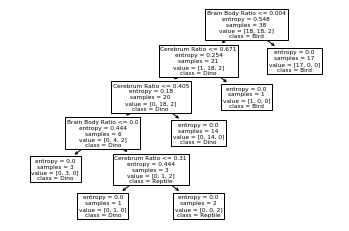

In [9]:
clf = tree.DecisionTreeClassifier()
x = data[:,5:]
y = data[:,1]
clf = clf.fit(x, y)
tree.plot_tree(clf, class_names=["Bird","Dino", "Reptile"], feature_names=["Brain Body Ratio", "Cerebrum Ratio"]) 
plt.show()

Use the `graphviz` library to beautify your decision tree a little bit. You can also create a decision surface for your decision tree to show the regions predicted for birds, dinosaurs, and reptiles.